## Create a **BINARY MASK** to outline the fruits

I want to obtain a binary mask of the apple to outline the fruit.

First, I used a global thresholding approach, using Otsu's method to calculate the threshold. 

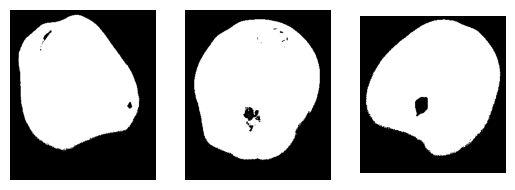

In [ ]:
im_th = []
for i in range(N):
    _,im = cv.threshold(np.uint8(nir_img[i]),40,255,cv.THRESH_BINARY + cv.THRESH_OTSU)
    im_th.append(im)

plot_images(im_th)

Per evidenziare meglio il frutto soprattutto in quelle zone dove la luminiosità è minore, aumento il contrasto dell'immagine. E poi applico il thresholding su quest'ultima.

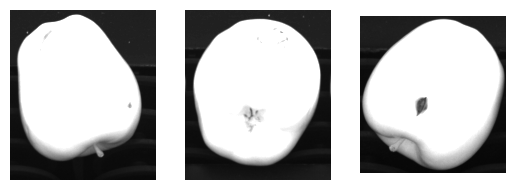

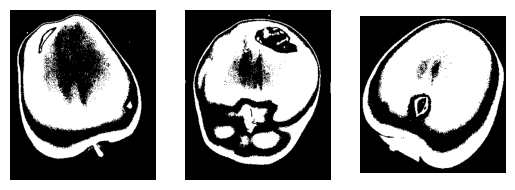

In [ ]:
im_th = []
contrast_higher = []
for i in range(N):
    contrast_higher.append(nir_img[i]*2.2)
    _,im = cv.threshold(np.uint8(contrast_higher[i]),40,255*2.2,cv.THRESH_BINARY + cv.THRESH_OTSU)
    im_th.append(im)

plot_images(contrast_higher)
plot_images(im_th)

Mantengo solo il connected components con bounding box piu grande

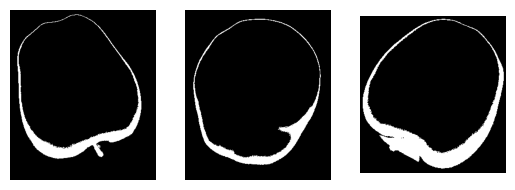

In [ ]:
binary_mask = []
for i in range(N):
    (numLabels, labels, stats, _) = cv.connectedComponentsWithStats(np.uint8(im_th[i]), 4)
    max_area = -np.inf
    j_mask = -1
    for j in range(1,numLabels):
        w = stats[j, cv.CC_STAT_WIDTH]
        h = stats[j, cv.CC_STAT_HEIGHT]
        area_bbox = h*w
        if (area_bbox>max_area):
            max_area = area_bbox
            j_mask = j
    binary_mask.append((labels == j_mask).astype("uint8") * 255)
plot_images(binary_mask)

Suppongo che il profilo non tocchi i bordi dell'immagine. Posso quindi fare flood fill dello sfondo a partire dal pixel (0,0). Inverto poi l'immagine per ottenere la maschere dei 'buchi' all'interno della maschera della mela. Mettendo quindi in or la maschera originale con la maschera dei buchi, ottendo una maschera binaria della mela senza buchi. 

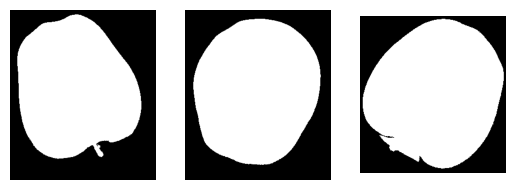

In [ ]:
# flood fill background
op_mask = []
for i in range(N):
    h, w = binary_mask[i].shape[:2]
    op_mask.append(np.zeros((h+2, w+2), np.uint8))
    holes = binary_mask[i].copy()
    cv.floodFill(holes,op_mask[i] , (0, 0), 255)
    holes = cv.bitwise_not(holes)
    binary_mask[i] = cv.bitwise_or(binary_mask[i],holes)
plot_images(binary_mask)

Apply the mask to the nir image